Trades shape: (2713, 5)
Transactions shape: (885, 4)
Labels shape: (100, 1)

Sample trades:


,user_id,timestamp,trade_amount,trade_duration_seconds,profit_loss
0,0,2025-01-21 06:48:18.101053,745.394245,3152,-68.796272
1,0,2025-01-29 10:48:18.101053,144.976170,1542,73.235229
2,0,2025-01-14 03:48:18.101053,185.723477,190,-95.883101
3,0,2025-01-24 07:48:18.101053,840.820509,2913,-99.844247
4,0,2025-01-21 12:48:18.101053,636.607434,3445,4.951286



Sample transactions:


,user_id,timestamp,transaction_type,amount
0,0,2025-01-18 23:48:18.101553,withdrawal,1070.419875
1,0,2025-01-28 23:48:18.101553,withdrawal,522.004840
2,0,2025-01-24 23:48:18.101553,deposit,741.468826
3,0,2025-02-02 23:48:18.101553,deposit,714.085571
4,0,2025-01-26 23:48:18.101553,withdrawal,867.288725



User labels:


,is_fraudulent
0,False
1,False
2,True
3,False
4,False



Engineered features shape: (100, 18)

Feature columns:


['trade_amount_count',
 'trade_amount_mean',
 'trade_amount_std',
 'trade_amount_sum',
 'trade_duration_seconds_mean',
 'trade_duration_seconds_std',
 'profit_loss_mean',
 'profit_loss_std',
 'profit_loss_sum',
 'deposit_amount_count',
 'deposit_amount_mean',
 'deposit_amount_sum',
 'withdrawal_amount_count',
 'withdrawal_amount_mean',
 'withdrawal_amount_sum',
 'deposit_withdrawal_ratio',
 'avg_trade_amount_per_deposit',
 'trade_frequency']

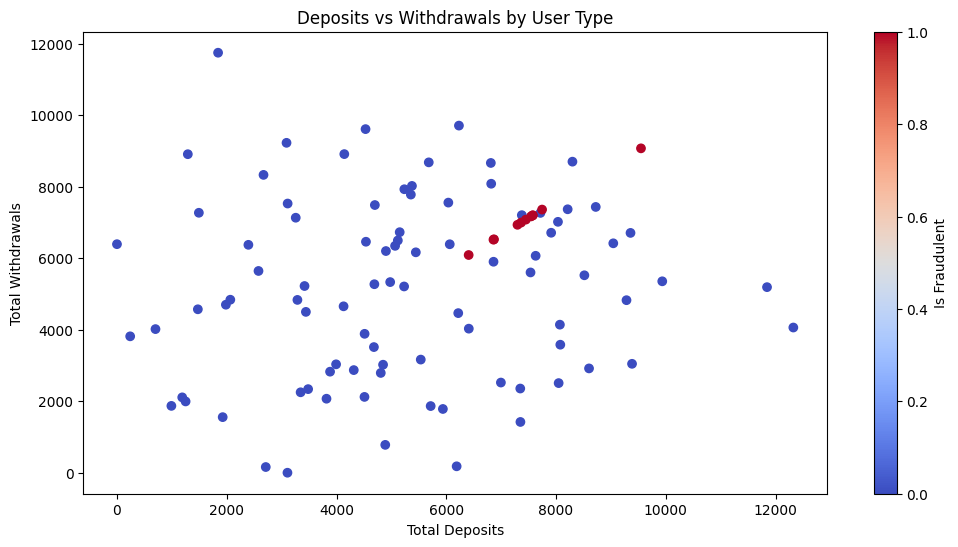

In [5]:
# Import necessary modules - adjust the path to include our src directory
import sys
sys.path.append('..')

# Import our custom modules
from src.utils.data_generator import DataGenerator
from src.utils.feature_engineering import FeatureEngineer

# Standard data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
generator = DataGenerator(seed=42)
trades_df, transactions_df, labels_df = generator.generate_dataset(n_users=100)

# Look at the data
print("Trades shape:", trades_df.shape)
print("Transactions shape:", transactions_df.shape)
print("Labels shape:", labels_df.shape)

# Display sample of each dataframe
print("\nSample trades:")
display(trades_df.head())

print("\nSample transactions:")
display(transactions_df.head())

print("\nUser labels:")
display(labels_df.head())

# Engineer features
engineer = FeatureEngineer()
features = engineer.calculate_user_features(trades_df, transactions_df)

# Look at engineered features
print("\nEngineered features shape:", features.shape)
print("\nFeature columns:")
display(features.columns.tolist())

# Quick visualization of some key features
plt.figure(figsize=(12, 6))
plt.scatter(
    features['deposit_amount_sum'],
    features['withdrawal_amount_sum'],
    c=labels_df['is_fraudulent'],
    cmap='coolwarm'
)
plt.xlabel('Total Deposits')
plt.ylabel('Total Withdrawals')
plt.title('Deposits vs Withdrawals by User Type')
plt.colorbar(label='Is Fraudulent')
plt.show()